# Support Vector Classifier Implementation

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [161]:
# Synthetic data generation
from sklearn.datasets import make_classification

In [162]:
X,y=make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2,n_redundant=0, random_state=15)

In [163]:
X

array([[-0.46693601,  1.06659489],
       [-0.05774389, -0.21545419],
       [-1.26900974,  0.90905169],
       ...,
       [ 0.79045081,  1.29001822],
       [-1.22107803, -0.65407191],
       [-0.36646931, -1.7293461 ]], shape=(1000, 2))

In [164]:
y

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,

<Axes: xlabel='0', ylabel='1'>

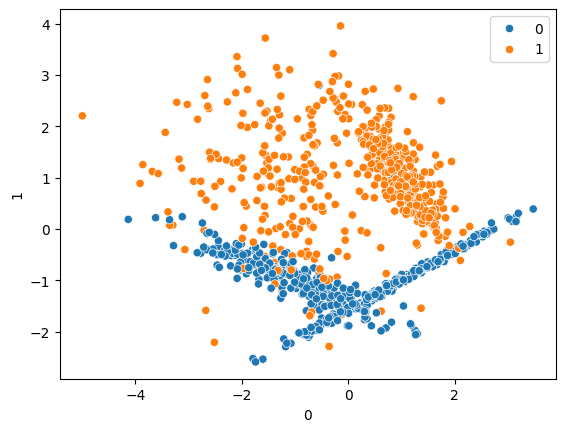

In [165]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1], hue=y)

In [166]:
from sklearn.svm import SVC
model=SVC(kernel='linear')

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [168]:
model.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [169]:
y_pred=model.predict(X_test)

In [170]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[114   2]
 [ 19 115]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       116
           1       0.98      0.86      0.92       134

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [171]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_rbf=rbf.predict(X_test)
print(confusion_matrix(y_test,y_rbf))
print(classification_report(y_test,y_rbf))

[[115   1]
 [ 14 120]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       116
           1       0.99      0.90      0.94       134

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250



In [172]:
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)
y_poly=poly.predict(X_test)
print(confusion_matrix(y_test,y_poly))
print(classification_report(y_test,y_poly))

[[114   2]
 [ 14 120]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       116
           1       0.98      0.90      0.94       134

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [173]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_sigmoid=sigmoid.predict(X_test)
print(confusion_matrix(y_test,y_sigmoid))
print(classification_report(y_test,y_sigmoid))

[[107   9]
 [ 26 108]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       116
           1       0.92      0.81      0.86       134

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.87      0.86      0.86       250



In [174]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [175]:
grid=GridSearchCV(SVC(), param_grid,refit=True, cv=5,verbose=3)

In [176]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [177]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}